# 1. Data Collection
Data for this project was downloaded using Kaggle API through the following commands:
<br>
`pip install kaggle` 
<br>
`kaggle competitions download -c champs-scalar-coupling`
<br>
Note that only `train.csv`, `structures.csv` and folder `structures` would be used in this project.

# 2. Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

## 2.1 Dataset `train.csv`

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [3]:
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4659076 entries, 0 to 4659075
Data columns (total 6 columns):
id                          4659076 non-null int64
molecule_name               4659076 non-null object
atom_index_0                4659076 non-null int64
atom_index_1                4659076 non-null int64
type                        4659076 non-null object
scalar_coupling_constant    4659076 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 213.3+ MB


There is no null values in `train`. Data types for each feature looks reasonable.

In [4]:
train.duplicated().any()

False

There is no duplicated rows in `train`.

## 2.2 Dataset `structures.csv`

In [5]:
structures = pd.read_csv('structures.csv')
structures.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [6]:
structures.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358875 entries, 0 to 2358874
Data columns (total 6 columns):
molecule_name    2358875 non-null object
atom_index       2358875 non-null int64
atom             2358875 non-null object
x                2358875 non-null float64
y                2358875 non-null float64
z                2358875 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 108.0+ MB


There is no null values in `structures`.

In [7]:
structures.duplicated().any()

False

There is no duplicated rows in `structures`.

# 3. Exploratory Data Analysis

In [8]:
train.describe()

,id,atom_index_0,atom_index_1,scalar_coupling_constant
count,4.659076e+06,4.659076e+06,4.659076e+06,4.659076e+06
mean,2.329538e+06,1.335677e+01,5.881245e+00,1.591591e+01
std,1.344960e+06,3.269432e+00,4.993794e+00,3.493466e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,-4.476050e+01
25%,1.164769e+06,1.100000e+01,2.000000e+00,-2.551463e-01
50%,2.329538e+06,1.300000e+01,5.000000e+00,2.280350e+00
75%,3.494306e+06,1.600000e+01,8.000000e+00,7.389100e+00
max,4.659075e+06,2.800000e+01,2.800000e+01,2.077090e+02


`scalar_coupling_constant` could be negative and positive.

In [9]:
print('There are {} entries in train.csv'.format(len(train)))
print('There are {} different molecules in train.csv.'
      .format(train.molecule_name.nunique()))
print('There are {} different kinds of coupling types in train.csv.'
     .format(train.type.nunique()))

There are 4659076 entries in train.csv
There are 85012 different molecules in train.csv.
There are 8 different kinds of coupling types in train.csv.


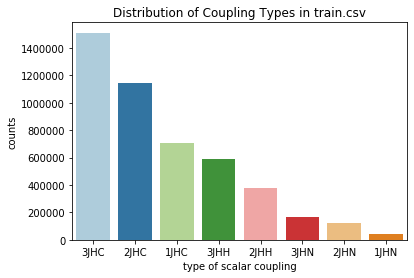

In [10]:
s1 = train.type.value_counts()
sns.barplot(x=s1.index, y=s1, palette='Paired')
plt.xlabel('type of scalar coupling')
plt.ylabel('counts')
plt.title('Distribution of Coupling Types in train.csv')
plt.show()

From the barplot above, we can see that three-bond coupling `3J` between carbon `C` and hydrogen `H` is the most common coupling type, and one-bond coupling `1J` between hydrogen `H` and nitrogen `N` is the most rare in `train`.

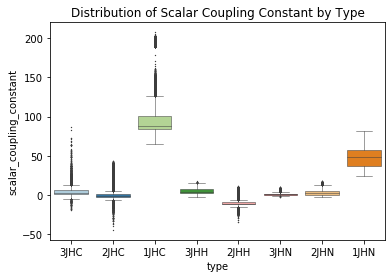

In [11]:
sns.boxplot(x='type',
            y='scalar_coupling_constant', 
            data=train,
            linewidth=0.5,
            fliersize=0.5,
            order=s1.index,
            palette='Paired')
plt.title('Distribution of Scalar Coupling Constant by Type')
plt.show()

The boxplot above shows the distribution of scalar coupling constant by type. All one-bond couplings including `1JHC` and `1JHN` have positive scalar coupling constant as expected, and for most of `3JHC`, scalar coupling constants are positive or very close to 0. It appears that one-bond coupling `1JHC` has the highest overall magnitude.

In [12]:
print('There are {} entried in structures.csv.'.format(len(structures)))
print('There are {} different molecules in structures.csv.'
      .format(structures.molecule_name.nunique()))
print('There are {} different kinds of atoms in structures.csv.'
     .format(structures.atom.nunique()))

There are 2358875 entried in structures.csv.
There are 130789 different molecules in structures.csv.
There are 5 different kinds of atoms in structures.csv.


In [13]:
structures.describe()

,atom_index,x,y,z
count,2.358875e+06,2.358875e+06,2.358875e+06,2.358875e+06
mean,8.757255e+00,9.495981e-02,-3.335625e-01,6.239050e-02
std,5.592444e+00,1.655403e+00,1.989328e+00,1.445876e+00
min,0.000000e+00,-9.234889e+00,-9.933938e+00,-9.134765e+00
25%,4.000000e+00,-8.746228e-01,-1.826097e+00,-8.424758e-01
50%,9.000000e+00,5.183962e-02,-4.034906e-01,1.092888e-02
75%,1.300000e+01,1.116163e+00,1.373848e+00,9.393901e-01
max,2.800000e+01,9.382240e+00,1.018196e+01,7.894733e+00


`Structures` contains much more molecules than does `train`, including those not present in `train`.

In [14]:
structures.atom.value_counts()

H    1208486
C     831809
O     183202
N     132382
F       2996
Name: atom, dtype: int64

There 2996 atom pairs that contain Fluorine `F`, and this project does not require prediction of `scalar_coupling_constant` for any pair that contains `F`.

In [15]:
# generate a feature called count_of_atoms to show the number of atoms in the molecules

structures['count_of_atoms'] = structures.groupby('molecule_name')['atom_index'].transform('count')
structures.head()

,molecule_name,atom_index,atom,x,y,z,count_of_atoms
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001,5
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976,5
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277,5
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644,5
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397,5


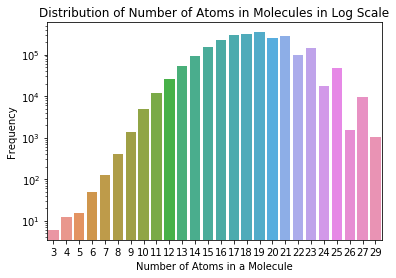

In [16]:
s = structures['count_of_atoms'].value_counts().sort_index()
sns.barplot(s.index, s.values)
plt.xlabel('Number of Atoms in a Molecule')
plt.yscale('log')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Atoms in Molecules in Log Scale')
plt.show()

From the barplot above we can see that most of molecules consist of 15-21 atoms, small molecules containing less than 10 atoms are not common in this dataset. 

In [17]:
# break down type into 2 other features

train['bond_length'] = train['type'].str[0]
train['atom_1'] = train['type'].str[3]

train.head(10)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,C
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,C
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.2541,2,H
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.2548,2,H
7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093,1,C
8,8,dsgdb9nsd_000001,3,4,2JHH,-11.2543,2,H
9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095,1,C


The column of type of coupling (e.g. `1JHC`) was broken down into different columns containing one single piece of attribute (e.g. 1 for `bond_length`, C for `atom_1`) for convenience of analysis (`atom_0` was omitted as all `train['type'].str[2]` is `H`.


In [18]:
df = train.merge(structures, 
                 how='left', 
                 left_on=['molecule_name', 'atom_index_0'], 
                 right_on=['molecule_name', 'atom_index']).merge(structures, 
                 how='left', 
                 left_on=['molecule_name', 'atom_index_1', 'atom_1', 'count_of_atoms'], 
                 right_on=['molecule_name', 'atom_index', 'atom', 'count_of_atoms'], suffixes=['_0', '_1'])
df.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_1,atom_index_0,atom_0,x_0,y_0,z_0,count_of_atoms,atom_index_1,atom_1,x_1,y_1,z_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,C,1,H,0.002150,-0.006031,0.001976,5,0,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,1,H,0.002150,-0.006031,0.001976,5,2,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,1,H,0.002150,-0.006031,0.001976,5,3,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,1,H,0.002150,-0.006031,0.001976,5,4,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,C,2,H,1.011731,1.463751,0.000277,5,0,C,-0.012698,1.085804,0.008001


In [19]:
final = df.loc[:, ~df.columns.duplicated()].set_index('id')
final.head()

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_1,atom_0,x_0,y_0,z_0,count_of_atoms,x_1,y_1,z_1
id,,,,,,,,,,,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,C,H,0.002150,-0.006031,0.001976,5,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H,0.002150,-0.006031,0.001976,5,1.011731,1.463751,0.000277
2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H,0.002150,-0.006031,0.001976,5,-0.540815,1.447527,-0.876644
3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H,0.002150,-0.006031,0.001976,5,-0.523814,1.437933,0.906397
4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,C,H,1.011731,1.463751,0.000277,5,-0.012698,1.085804,0.008001


Duplicated columns need to be removed.

In [20]:
# https://www.kaggle.com/seriousran/just-speed-up-calculate-distance-from-benchmark

p0 = final[['x_0', 'y_0', 'z_0']].values 
p1 = final[['x_1', 'y_1', 'z_1']].values
final['distance'] = np.linalg.norm(p0 - p1, axis=1)
final.head()

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_1,atom_0,x_0,y_0,z_0,count_of_atoms,x_1,y_1,z_1,distance
id,,,,,,,,,,,,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,C,H,0.002150,-0.006031,0.001976,5,-0.012698,1.085804,0.008001,1.091953
1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H,0.002150,-0.006031,0.001976,5,1.011731,1.463751,0.000277,1.783120
2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H,0.002150,-0.006031,0.001976,5,-0.540815,1.447527,-0.876644,1.783147
3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H,0.002150,-0.006031,0.001976,5,-0.523814,1.437933,0.906397,1.783157
4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,C,H,1.011731,1.463751,0.000277,5,-0.012698,1.085804,0.008001,1.091952


Efficiently calculated distance between 2 atoms with cartesian coordinate values.

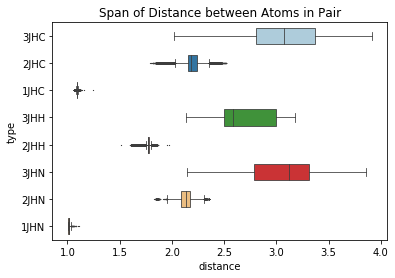

In [21]:
sns.boxplot(x='distance', 
            y='type', 
            data=final, 
            width=0.6, 
            fliersize=0.4,
            linewidth=0.8,
            palette='Paired',
            order=s1.index)
plt.title('Span of Distance between Atoms in Pair')
plt.show()

From the boxplot above, we can see that in general the atom pairs of `3J` are more far apart than those of `1J`.

In [22]:
final['distance_zscore_by_type'] = final.groupby('type')['distance'].transform(zscore)
final['distance_mean_by_type'] = final.groupby('type')['distance'].transform('mean')
final['distance_mean_by_bond_length'] = final.groupby('bond_length')['distance'].transform('mean')
final['distance_zscore_by_bond_length'] = final.groupby('bond_length')['distance'].transform(zscore)
final['distance_mean_by_atom_1'] = final.groupby('atom_1')['distance'].transform('mean')
final['distance_zscore_by_atom_1'] = final.groupby('atom_1')['distance'].transform(zscore)
final['distance_x'] = (final.x_0 - final.x_1).abs()
final['distance_y'] = (final.y_0 - final.y_1).abs()
final['distance_z'] = (final.z_0 - final.z_1).abs()

final.head()

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_1,atom_0,x_0,y_0,...,distance,distance_zscore_by_type,distance_mean_by_type,distance_mean_by_bond_length,distance_zscore_by_bond_length,distance_mean_by_atom_1,distance_zscore_by_atom_1,distance_x,distance_y,distance_z
id,,,,,,,,,,,,,,,,,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,C,H,0.002150,-0.006031,...,1.091953,-0.138877,1.092900,1.088254,0.185838,2.358492,-1.598941,0.014849,1.091835,0.006025
1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H,0.002150,-0.006031,...,1.783120,0.353453,1.774872,2.090498,-1.628423,2.340031,-1.119658,1.009580,1.469782,0.001700
2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H,0.002150,-0.006031,...,1.783147,0.354641,1.774872,2.090498,-1.628276,2.340031,-1.119603,0.542965,1.453558,0.878620
3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H,0.002150,-0.006031,...,1.783157,0.355035,1.774872,2.090498,-1.628227,2.340031,-1.119584,0.525964,1.443964,0.904421
4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,C,H,1.011731,1.463751,...,1.091952,-0.139088,1.092900,1.088254,0.185766,2.358492,-1.598943,1.024429,0.377947,0.007724


In [23]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D 
from rdkit.Chem import rdDepictor, Draw 
from glob import glob
from xyz2mol import xyz2mol, read_xyz_file
from rdkit.Chem.rdMolTransforms import GetAngleDeg, GetDihedralDeg

filepath_list = list(glob('./structures/*.xyz'))
filepath_list.sort()

mol_dict = {}
num_mols = len(filepath_list)
fails_path = []
for i in range(num_mols):
    filepath = filepath_list[i]
    atomicNumList, charge, xyz_coordinates = read_xyz_file(filepath)
    try:
        mol = xyz2mol(atomicNumList, 
                  charge, 
                  xyz_coordinates, 
                  charged_fragments=False, 
                  quick=True, 
                  huckel=False)
    except:
        fails_path.append(filepath)
    mol_dict[filepath[13:-4]] = mol

RDKit WARNING: [00:06:38] Enabling RDKit 2019.09.3 jupyter extensions


Above scripts are to extract `.xyz` documents from folder `structures`, and then convert `.xyz` filed into `.mol` files which can be read by `rdkit` library. `.mol` files could help us see structures of molecules and would facilitate calculation of new features.

In [24]:
fails = len(fails_path)
fail_molecules = [i[13:-4] for i in fails_path]
fails_ = (pd.Series(fail_molecules).isin(final.molecule_name)).sum()
_ = len(final.loc[final.molecule_name.isin(fail_molecules)])
print('There are {} molecules that could not be read with RDKIT '
      'in structures.csv; {} of these molecules are present in '
      'DataFrame-final. There are {} relevant entries in final '
      'that cannot be read with RDKIT and therefore are temporarily '
      'removed.'.format(fails, fails_, _))

There are 366 molecules that could not be read with RDKIT in structures.csv; 234 of these molecules are present in DataFrame-final. There are 11058 relevant entries in final that cannot be read with RDKIT and therefore are temporarily removed.


There are a very small percentage of molecules in `final` that could not be read by `rdkit` library. This is mainly because `rdkit` has problem dealing with molecules containing quaternary ammonium group `NH4`. For now we will just omit these unreadble molecules and study the rest of molecules.

In [25]:
# total number of molecules, total number of entries in 'final' and the number of total readable molecules

len(final.molecule_name.unique()), len(final), len(mol_dict) 

(85012, 4659076, 130789)

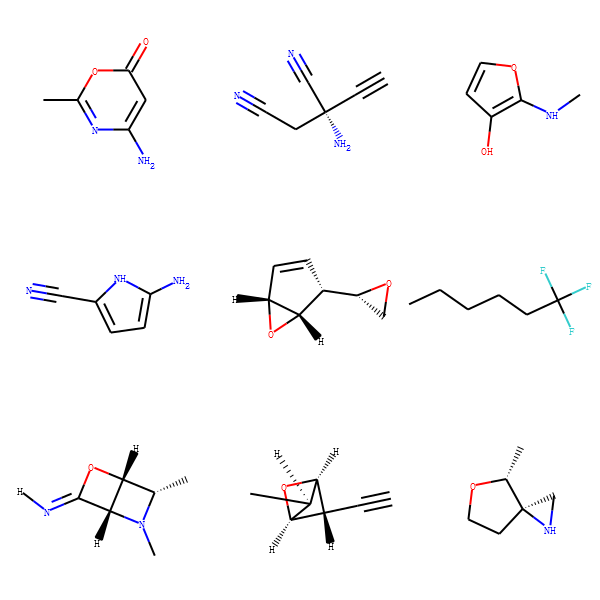

In [26]:
# draw out 9 random molecules
mols = np.random.choice(list(mol_dict.keys()), 9)
Draw.MolsToGridImage([Chem.MolFromSmiles(Chem.MolToSmiles(mol_dict[_])) for _ in mols], molsPerRow=3)

In [27]:
# unreadable molecules are filtered

filtered = final.loc[~final.molecule_name.isin(fail_molecules)]
df = filtered.copy()
df_2j = df.loc[df.type.str.startswith('2')]

In [28]:
def degree_2J(m, atom_index_0, atom_index_1):
    atom0 = m.GetAtomWithIdx(atom_index_0)
    if atom0.GetAtomicNum() == 1:
        neighbor = atom0.GetNeighbors()[0].GetIdx() 
        # for 2J coupling between H and another atom, 
        # there could be only one common neighbor,
        # because H has valence of 1, 
        # so only the first neighbor is selected using index 0
    else:
        neighbor = m.GetAtomWithIdx(atom_index_1).GetNeighbors()[0].GetIdx()
    return np.mean([GetAngleDeg(conf, atom_index_0, neighbor, atom_index_1) for conf in m.GetConformers()])

def find_neighbors(m, idx):
    neighbor = [x.GetIdx() for x in m.GetAtomWithIdx(idx).GetNeighbors()]
    return neighbor 

def degree_3J(m, atom_index_0, atom_index_1):
    atom0 = m.GetAtomWithIdx(atom_index_0)
    if atom0.GetAtomicNum() == 1:
        immediate0 = atom0.GetNeighbors()[0].GetIdx() 
        # immediate neighbor of 0
        # for 3J coupling between H and another atom, 
        # H could only have one neighbor,
        # because H has valence of 1, 
        # so only the first neighbor is selected using index 0
        secondary = find_neighbors(m, immediate0) # immediate neighbors of 0
        secondary.remove(atom_index_0) #remove atom0 from its own secondary neighbor
        for i in secondary:
            third = find_neighbors(m, i)
            third.remove(immediate0)
            if atom_index_1 in third:
                immediate1 = i
                
    else:
        immediate1 = atom1.GetNeighbors()[0].GetIdx()
        secondary = find_neighbors(m, immediate1) 
        secondary.remove(atom_index_1)
        for i in secondary:
            third = find_neighbors(m, i)
            third.remove(immediate1)
            if atom_index_0 in third:
                immediate0 = i
    degree = np.mean([GetDihedralDeg(conf, atom_index_0, immediate0, immediate1, atom_index_1) for conf in m.GetConformers()])
    if degree < 0:
        degree = -degree
    return degree

def degree_3JHH(m, atom_index_0, atom_index_1):
    atom0 = m.GetAtomWithIdx(atom_index_0)
    immediate0 = atom0.GetNeighbors()[0].GetIdx() 
    atom1 = m.GetAtomWithIdx(atom_index_1)
    immediate1 = atom1.GetNeighbors()[0].GetIdx() 
   
    degree = np.mean([GetDihedralDeg(conf, atom_index_0, immediate0, immediate1, atom_index_1) for conf in m.GetConformers()])
    if degree < 0:
        degree = -degree
    return degree

def getdegree(df, func):
    for row in df.itertuples():
        m = mol_dict[row.molecule_name]
        #print(m)
        try:
            df.at[row.Index, 'degree'] = func(m, row.atom_index_0, row.atom_index_1)
        except:
            df.at[row.Index, 'degree'] = np.nan
        
    return df

In [29]:
%%time
getdegree(df_2j, degree_2J)

C:\Users\elich\Anaconda3\envs\myenv\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\elich\Anaconda3\envs\myenv\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Wall time: 2min 31s


,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_1,atom_0,x_0,y_0,...,distance_zscore_by_type,distance_mean_by_type,distance_mean_by_bond_length,distance_zscore_by_bond_length,distance_mean_by_atom_1,distance_zscore_by_atom_1,distance_x,distance_y,distance_z,degree
id,,,,,,,,,,,,,,,,,,,,,
1,dsgdb9nsd_000001,1,2,2JHH,-11.257000,2,H,H,0.002150,-0.006031,...,0.353453,1.774872,2.090498,-1.628423,2.340031,-1.119658,1.009580,1.469782,0.001700,109.468408
2,dsgdb9nsd_000001,1,3,2JHH,-11.254800,2,H,H,0.002150,-0.006031,...,0.354641,1.774872,2.090498,-1.628276,2.340031,-1.119603,0.542965,1.453558,0.878620,109.471318
3,dsgdb9nsd_000001,1,4,2JHH,-11.254300,2,H,H,0.002150,-0.006031,...,0.355035,1.774872,2.090498,-1.628227,2.340031,-1.119584,0.525964,1.443964,0.904421,109.472067
5,dsgdb9nsd_000001,2,3,2JHH,-11.254100,2,H,H,1.011731,1.463751,...,0.355077,1.774872,2.090498,-1.628222,2.340031,-1.119582,1.552546,0.016225,0.876920,109.472349
6,dsgdb9nsd_000001,2,4,2JHH,-11.254800,2,H,H,1.011731,1.463751,...,0.354680,1.774872,2.090498,-1.628271,2.340031,-1.119601,1.535544,0.025819,0.906121,109.471420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659064,dsgdb9nsd_133884,16,6,2JHC,1.025490,2,C,H,-0.084531,1.110807,...,1.340376,2.190344,2.090498,1.135647,2.358492,-0.067707,0.057455,0.363774,2.275247,121.222737
4659066,dsgdb9nsd_133884,16,8,2JHC,9.119730,2,C,H,-0.084531,1.110807,...,0.889965,2.190344,2.090498,0.931781,2.358492,-0.116288,0.872287,1.950945,0.754589,120.420593
4659070,dsgdb9nsd_133884,17,3,2JHC,0.861412,2,C,H,1.126550,-1.348733,...,1.204454,2.190344,2.090498,1.074125,2.358492,-0.082368,0.799571,0.205462,2.139499,123.704137


In [30]:
df_3jhh = df[df.type == '3JHH']
df_3j = df[(df.type == '3JHC') | (df.type == '3JHN')]

In [31]:
%%time
getdegree(df_3jhh, degree_3JHH)

Wall time: 41.9 s


,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_1,atom_0,x_0,y_0,...,distance_zscore_by_type,distance_mean_by_type,distance_mean_by_bond_length,distance_zscore_by_bond_length,distance_mean_by_atom_1,distance_zscore_by_atom_1,distance_x,distance_y,distance_z,degree
id,,,,,,,,,,,,,,,,,,,,,
25,dsgdb9nsd_000007,2,5,3JHH,3.252810,3,H,H,0.994873,1.939743,...,-0.598412,2.70178,2.978878,-1.273628,2.340031,0.408750,0.469386,2.341651,0.874603,60.002806
26,dsgdb9nsd_000007,2,6,3JHH,13.691300,3,H,H,0.994873,1.939743,...,1.488553,2.70178,2.978878,0.342204,2.340031,1.519657,2.006349,2.357777,0.006567,179.998989
27,dsgdb9nsd_000007,2,7,3JHH,3.252050,3,H,H,0.994873,1.939743,...,-0.598309,2.70178,2.978878,-1.273548,2.340031,0.408805,0.486247,2.332214,0.890542,59.997833
31,dsgdb9nsd_000007,3,5,3JHH,13.692400,3,H,H,-0.542076,1.923611,...,1.488554,2.70178,2.978878,0.342205,2.340031,1.519657,1.067563,2.325518,1.742661,179.999337
32,dsgdb9nsd_000007,3,6,3JHH,3.252530,3,H,H,-0.542076,1.923611,...,-0.598395,2.70178,2.978878,-1.273615,2.340031,0.408759,0.469400,2.341644,0.874626,60.004479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659030,dsgdb9nsd_133884,12,17,3JHH,4.671720,3,H,H,0.299624,-2.630218,...,0.028825,2.70178,2.978878,-0.787990,2.340031,0.742633,0.826926,1.281485,2.239398,0.000730
4659038,dsgdb9nsd_133884,13,14,3JHH,1.005250,3,H,H,2.582409,-1.260138,...,0.028985,2.70178,2.978878,-0.787866,2.340031,0.742718,0.494872,2.651627,0.255188,61.542721
4659039,dsgdb9nsd_133884,13,15,3JHH,1.005260,3,H,H,2.582409,-1.260138,...,0.028973,2.70178,2.978878,-0.787875,2.340031,0.742711,1.039491,1.807625,1.730051,61.542214


In [32]:
%%time
getdegree(df_3j, degree_3J)

Wall time: 2min 45s


,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_1,atom_0,x_0,y_0,...,distance_zscore_by_type,distance_mean_by_type,distance_mean_by_bond_length,distance_zscore_by_bond_length,distance_mean_by_atom_1,distance_zscore_by_atom_1,distance_x,distance_y,distance_z,degree
id,,,,,,,,,,,,,,,,,,,,,
60,dsgdb9nsd_000009,3,2,3JHC,4.551660,3,C,H,0.997822,1.874253,...,0.446509,3.079312,2.978878,0.701361,2.358492,1.085992,0.979481,3.066059,0.007111,140.615151
65,dsgdb9nsd_000009,4,2,3JHC,4.554100,3,C,H,-0.542204,1.858012,...,0.446363,3.079312,2.978878,0.701228,2.358492,1.085935,0.560545,3.049817,0.862707,99.386230
69,dsgdb9nsd_000009,5,2,3JHC,4.553410,3,C,H,-0.525333,1.848344,...,0.445885,3.079312,2.978878,0.700792,2.358492,1.085746,0.543674,3.040149,0.905986,20.614420
70,dsgdb9nsd_000009,6,0,3JHC,2.518650,3,C,H,0.032317,-2.253148,...,2.045346,3.079312,2.978878,2.161103,2.358492,1.716183,0.050138,3.717506,0.020354,39.506990
75,dsgdb9nsd_000010,3,2,3JHN,0.880802,3,N,H,1.002029,1.860899,...,0.373377,3.050041,2.978878,0.537072,2.449360,0.971084,0.984377,3.005429,0.006658,14.915754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659063,dsgdb9nsd_133884,16,5,3JHC,-0.184689,3,C,H,-0.084531,1.110807,...,0.253830,3.079312,2.978878,0.525444,2.358492,1.010046,1.500477,0.490033,2.735863,94.314707
4659068,dsgdb9nsd_133884,17,1,3JHN,-0.006537,3,N,H,1.126550,-1.348733,...,1.037684,3.050041,2.978878,1.122369,2.449360,1.243617,2.697650,1.396665,1.442112,108.114113
4659069,dsgdb9nsd_133884,17,2,3JHC,1.944380,3,C,H,1.126550,-1.348733,...,0.682931,3.079312,2.978878,0.917215,2.358492,1.179179,1.877399,0.746551,2.599771,145.642451


In [33]:
df_2jhc = df_2j[df_2j.type == '2JHC']
df_2jhn = df_2j[df_2j.type == '2JHN']
df_2jhh = df_2j[df_2j.type == '2JHH']
df_3jhc = df_3j[df_3j.type == '3JHC']
df_3jhn = df_3j[df_3j.type == '3JHN']

In [34]:
# broadcast the angle of 1J as 0 (in fact 1J does not have angle)

df_1jhc = df[df.type == '1JHC']
df_1jhn = df[df.type == '1JHN']
df_1jhc.loc[:, 'degree'] = 0
df_1jhn.loc[:, 'degree'] = 0

In [35]:
prepared = pd.concat([df_1jhc, df_1jhn, df_2jhh, df_2jhn, df_2jhc, 
                      df_3jhh, df_3jhn, df_3jhc]).sort_index()

prepared.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648018 entries, 0 to 4659075
Data columns (total 26 columns):
molecule_name                     4648018 non-null object
atom_index_0                      4648018 non-null int64
atom_index_1                      4648018 non-null int64
type                              4648018 non-null object
scalar_coupling_constant          4648018 non-null float64
bond_length                       4648018 non-null object
atom_1                            4648018 non-null object
atom_0                            4648018 non-null object
x_0                               4648018 non-null float64
y_0                               4648018 non-null float64
z_0                               4648018 non-null float64
count_of_atoms                    4648018 non-null int64
x_1                               4648018 non-null float64
y_1                               4648018 non-null float64
z_1                               4648018 non-null float64
distance     

In [36]:
# check if all degrees are calculated

prepared.type[prepared.degree.isnull()].value_counts() 

3JHC    3
3JHN    2
Name: type, dtype: int64

There are a few `3J` couplingd do not have dihedral angles.

In [37]:
prepared.loc[prepared.degree.isnull()&(prepared.type == '3JHC')]

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_1,atom_0,x_0,y_0,...,distance_zscore_by_type,distance_mean_by_type,distance_mean_by_bond_length,distance_zscore_by_bond_length,distance_mean_by_atom_1,distance_zscore_by_atom_1,distance_x,distance_y,distance_z,degree
id,,,,,,,,,,,,,,,,,,,,,
274,dsgdb9nsd_000024,3,1,3JHC,4.890360,3,C,H,-2.251772,0.000000,...,1.776953,3.079312,2.978878,1.916059,2.358492,1.610394,3.634104,0.000000,0.000000,NaN
1130483,dsgdb9nsd_038230,11,6,3JHC,2.485130,3,C,H,2.257031,2.168720,...,2.082725,3.079312,2.978878,2.195230,2.358492,1.730916,1.848296,1.728244,2.739830,NaN
1130514,dsgdb9nsd_038230,16,1,3JHC,0.560057,3,C,H,0.782832,0.410938,...,1.811642,3.079312,2.978878,1.947731,2.358492,1.624067,0.720331,1.049670,3.415386,NaN


In [38]:
prepared.loc[prepared.degree.isnull()&(prepared.type == '3JHN')]

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_1,atom_0,x_0,y_0,...,distance_zscore_by_type,distance_mean_by_type,distance_mean_by_bond_length,distance_zscore_by_bond_length,distance_mean_by_atom_1,distance_zscore_by_atom_1,distance_x,distance_y,distance_z,degree
id,,,,,,,,,,,,,,,,,,,,,
1130505,dsgdb9nsd_038230,14,8,3JHN,0.432052,3,N,H,-1.544869,-0.346674,...,2.678243,3.050041,2.978878,2.567808,2.44936,1.916657,3.358027,1.238203,1.437635,NaN
1130512,dsgdb9nsd_038230,15,8,3JHN,0.689029,3,N,H,-1.687110,1.299379,...,1.848981,3.050041,2.978878,1.837175,2.44936,1.576452,3.500268,0.407850,0.770162,NaN


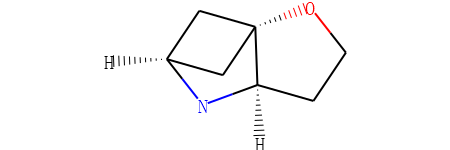

In [39]:
_ = mol_dict['dsgdb9nsd_038230']
_2d = Chem.MolFromSmiles(Chem.MolToSmiles(_)); _2d 

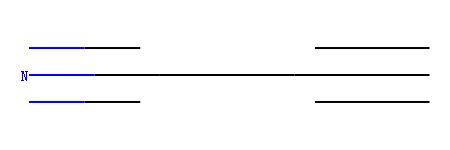

In [40]:
_ = mol_dict['dsgdb9nsd_000024']
_2d = Chem.MolFromSmiles(Chem.MolToSmiles(_)); _2d

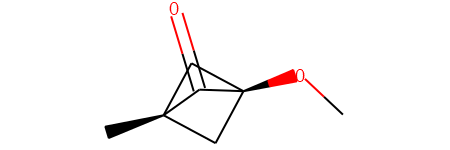

In [41]:
_ = mol_dict['dsgdb9nsd_106268']
_2d = Chem.MolFromSmiles(Chem.MolToSmiles(_)); _2d

These molecules do not have valid dihedral angles for some couplings because some bonds are in the same planes (no intersecting planes).

In [42]:
# fill 0 in degree == NaN 

prepared.fillna(0, inplace=True) 

In [43]:
prepared['degree_mean_by_type'] = prepared.groupby('type').degree.transform('mean')
prepared['degree_zscore_by_type'] = prepared.groupby('type').degree.transform(zscore)
prepared['degree_mean_by_bond_length'] = prepared.groupby('bond_length').degree.transform('mean')
prepared['degree_mean_by_atom_1'] = prepared.groupby('atom_1').degree.transform('mean')
prepared['degree_zscore_by_bond_length'] = prepared.groupby('bond_length').degree.transform(zscore)
prepared['degree_mean_by_atom_1'] = prepared.groupby('atom_1').degree.transform(zscore)

C:\Users\elich\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [44]:
# fill 0 for degree_zscore of 1JHC and 1JHN

prepared.fillna(0, inplace=True) 

In [45]:
df_1jhc = prepared[prepared.type == '1JHC']
df_1jhn = prepared[prepared.type == '1JHN']
df_2jhc = prepared[prepared.type == '2JHC']
df_2jhn = prepared[prepared.type == '2JHN']
df_2jhh = prepared[prepared.type == '2JHH']
df_3jhc = prepared[prepared.type == '3JHC']
df_3jhn = prepared[prepared.type == '3JHN']
df_3jhh = prepared[prepared.type == '3JHH']

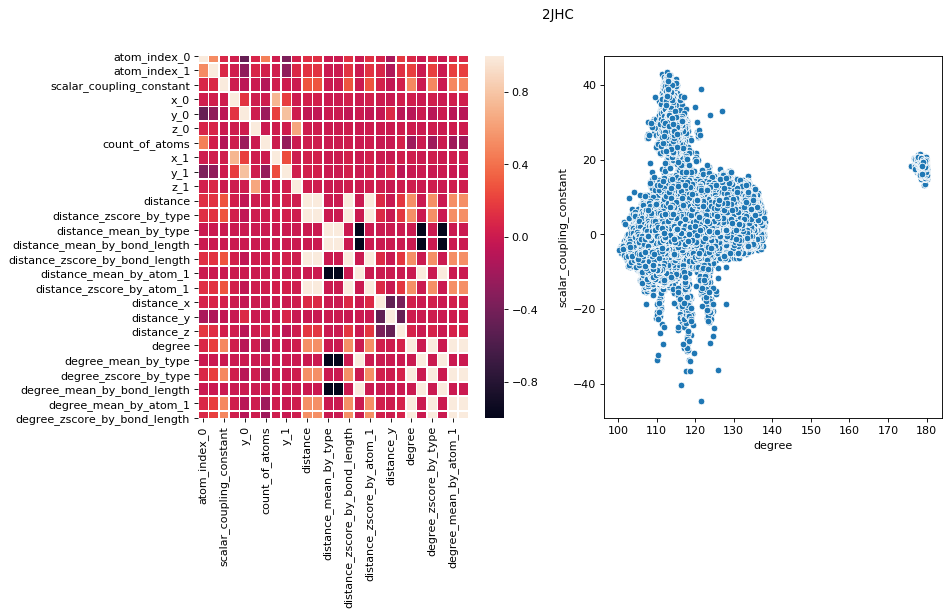

In [46]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(121)
sns.heatmap(df_2jhc.corr(method='pearson'), linewidth=.5)

plt.subplot(122)
sns.scatterplot(x='degree', y='scalar_coupling_constant', data=df_2jhc)

plt.suptitle('2JHC') 
plt.show()

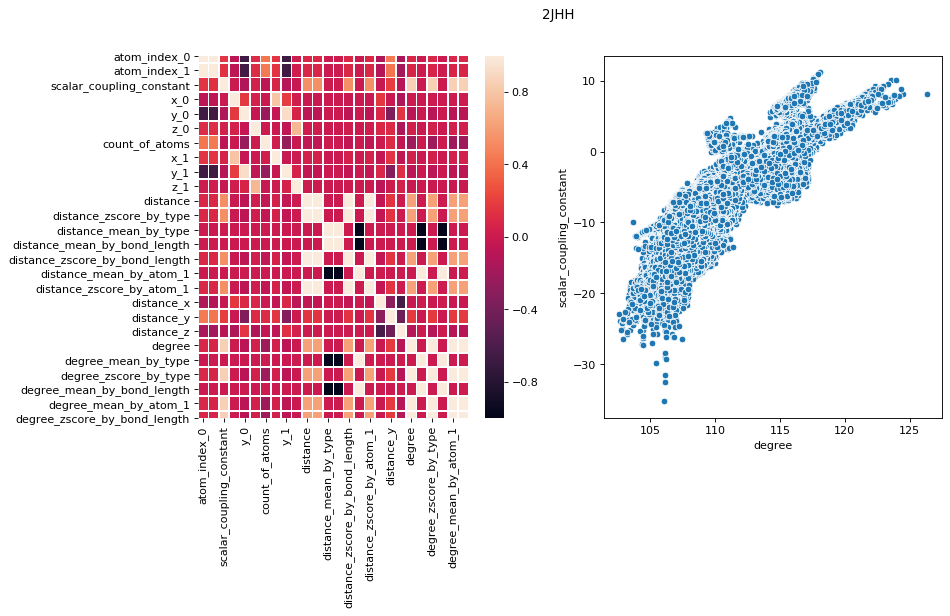

In [47]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(121)
sns.heatmap(df_2jhh.corr(method='pearson'), linewidth=.5)

plt.subplot(122)
sns.scatterplot(x='degree', y='scalar_coupling_constant', data=df_2jhh)

plt.suptitle('2JHH') 
plt.show()

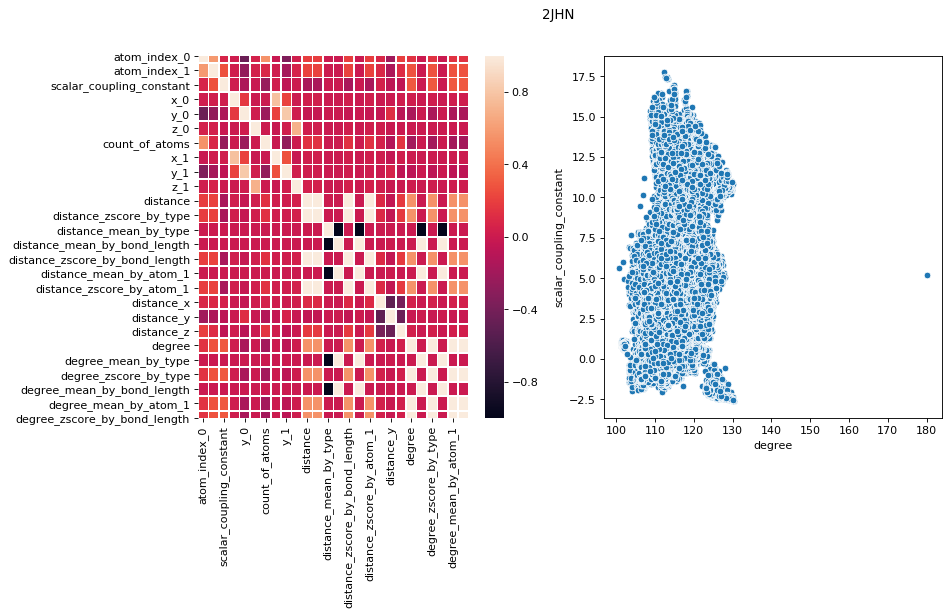

In [48]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(121)
sns.heatmap(df_2jhn.corr(method='pearson'), linewidth=.5)

plt.subplot(122)
sns.scatterplot(x='degree', y='scalar_coupling_constant', data=df_2jhn)

plt.suptitle('2JHN') 
plt.show()

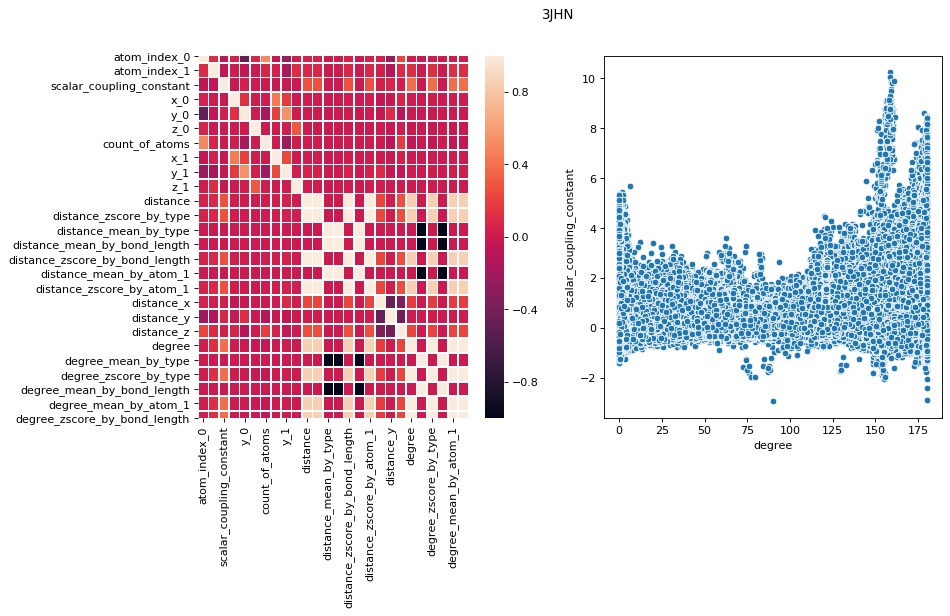

In [49]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(121)
sns.heatmap(df_3jhn.corr(method='pearson'), linewidth=.5)

plt.subplot(122)
sns.scatterplot(x='degree', y='scalar_coupling_constant', data=df_3jhn)

plt.suptitle('3JHN') 
plt.show()

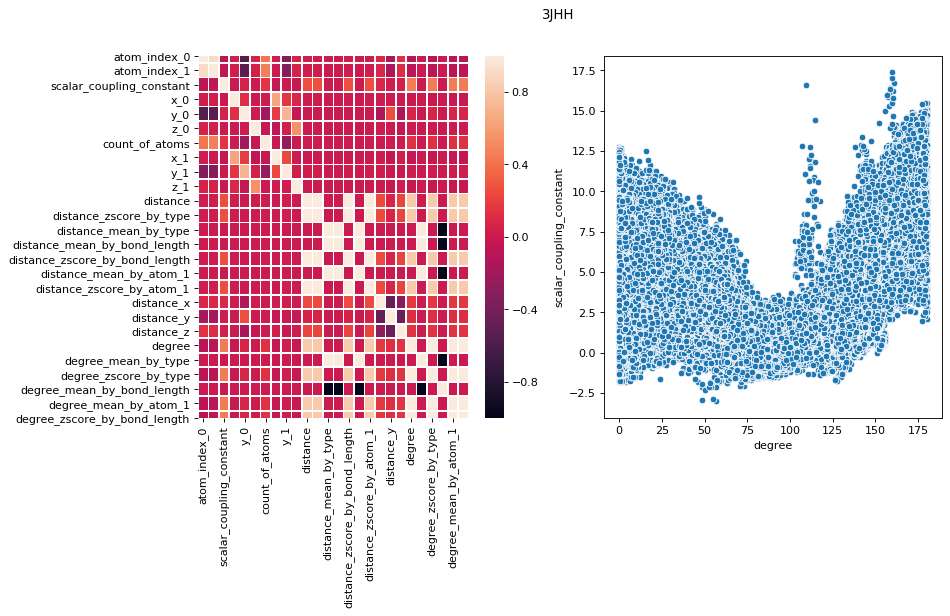

In [50]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(121)
sns.heatmap(df_3jhh.corr(method='pearson'), linewidth=.5)

plt.subplot(122)
sns.scatterplot(x='degree', y='scalar_coupling_constant', data=df_3jhh)

plt.suptitle('3JHH') 
plt.show()

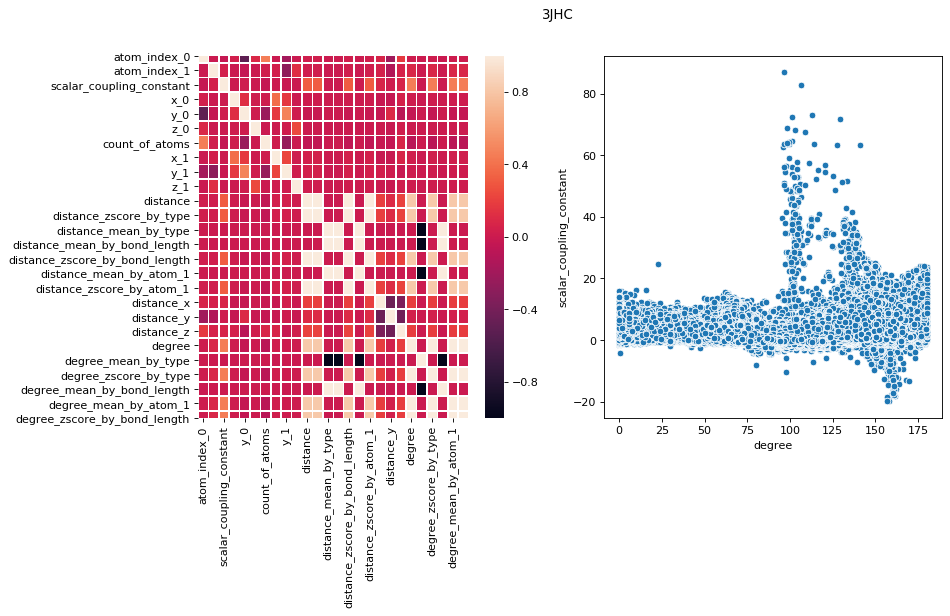

In [51]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(121)
sns.heatmap(df_3jhc.corr(method='pearson'), linewidth=.5)

plt.subplot(122)
sns.scatterplot(x='degree', y='scalar_coupling_constant', data=df_3jhc)

plt.suptitle('3JHC') 
plt.show()

From the heatmaps above we can see that there are 4 features that are specifically correlated to `scalar_coupling_constant`, namely `degree`, `degree_mean_by_atom_1`, `degree_zscore_by_bond_length` and `degree_zscore_by_type`.
<br>
The scatterplots of `2JHH` and `3JHH` look very interesting.

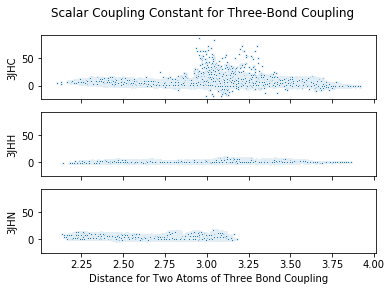

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True)
sns.scatterplot(x='distance', y='scalar_coupling_constant', data=df_3jhc, s=5, ax=axes[0])
sns.scatterplot(x='distance', y='scalar_coupling_constant', data=df_3jhn, s=5, ax=axes[1])
sns.scatterplot(x='distance', y='scalar_coupling_constant', data=df_3jhh, s=5, ax=axes[2])
axes[0].set(ylabel='3JHC')
axes[1].set(ylabel='3JHH')
axes[2].set(ylabel='3JHN')
plt.xlabel('Distance for Two Atoms of Three Bond Coupling')
plt.suptitle('Scalar Coupling Constant for Three-Bond Coupling')
plt.show()

For three-bond coupling `3J`, `scalar_coupling_constant` does not have strong correlation with distance in between the pair of atoms. It was expected that the distances of N-H and C-H three bond coupling have larger spread than that of H-H, since C-C bond and N-H bond are usually longer than C-H bond.

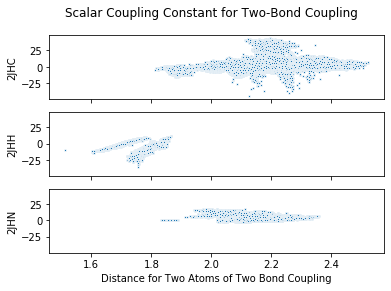

In [53]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True)
sns.scatterplot(x='distance', y='scalar_coupling_constant', data=df_2jhc, s=5, ax=axes[0])
sns.scatterplot(x='distance', y='scalar_coupling_constant', data=df_2jhh, s=5, ax=axes[1])
sns.scatterplot(x='distance', y='scalar_coupling_constant', data=df_2jhn, s=5, ax=axes[2])
axes[0].set(ylabel='2JHC')
axes[1].set(ylabel='2JHH')
axes[2].set(ylabel='2JHN')
plt.xlabel('Distance for Two Atoms of Two Bond Coupling')
plt.suptitle('Scalar Coupling Constant for Two-Bond Coupling')

plt.show()

For two-bond coupling `2J`, `scalar_coupling_constant` does not have strong correlation with distance in between the pair of atoms, except for 2JHH it seems that there was a positive correlation between distance and scalar coupling constant. Again, the distances of `2JHN` and `2JHC` were longer than `2JHH`. 

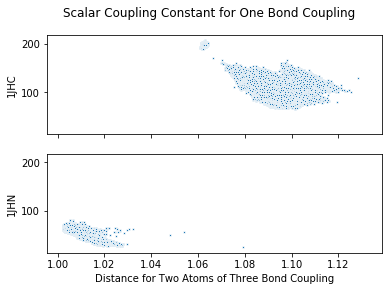

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
sns.scatterplot(x='distance', y='scalar_coupling_constant', data=df_1jhc, s=5, ax=axes[0])
sns.scatterplot(x='distance', y='scalar_coupling_constant', data=df_1jhn, s=5, ax=axes[1])

axes[0].set(ylabel='1JHC')
axes[1].set(ylabel='1JHN')
plt.xlabel('Distance for Two Atoms of Three Bond Coupling')
plt.suptitle('Scalar Coupling Constant for One Bond Coupling')

plt.show()

For one-bond coupling `1J`, `scalar_coupling_constants` were all positive and were negatively correlated to distance between two atoms. This is probably because for directly related atoms (that is to say these two atoms form one chemical bond), the more far apart the two atoms, the less impact they have on each other, and therefore the scalar coupling is less significant.

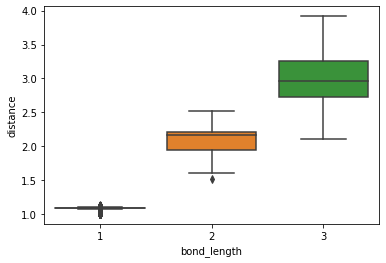

In [55]:
sns.boxplot(x='bond_length', y='distance', data=prepared)
plt.show()

# 4. Data Statistics

Among the scatterplots of `distance` vs `scalar_coupling_constant` in Part 3, there are 3 particular plots that show no obvious correlation between `distance` and `scalar_coupling_constant`. Therefore permutation tests should be done to investigate if correlation exists.

In [56]:
def pearson_r(x, y): return np.corrcoef(x, y)[0,1]

def correlation(s, d, n):
    r_obs = pearson_r(s,d)

    perm_replicates = np.empty(n)
    for i in range(len(perm_replicates)):
        s_permuted = np.random.permutation(s)
        perm_replicates[i] = pearson_r(s_permuted, d)


    p = np.sum(perm_replicates >= r_obs)/n
    return r_obs, p

In [57]:
s = df_3jhn.scalar_coupling_constant
d = df_3jhn.distance
r_obs, p = correlation(s, d, 1000)
print('Observed pearson r value is {}. ' 
      'Null Hypothsis: distance and scalar coupling constant are not correlated for coupling type 3JHN. ' 
      'p value = {}.'.format(r_obs,p))


s = df_2jhn.scalar_coupling_constant
d = df_2jhn.distance
r_obs, p = correlation(s, d, 1000)
print('Observed pearson r value is {}. ' 
      'Null Hypothsis: distance and scalar coupling constant are not correlated for coupling type 2JHN. ' 
      'p value = {}. '.format(r_obs,p))


s = df_3jhh.scalar_coupling_constant
d = df_3jhh.distance
r_obs, p = correlation(s, d, 1000)
print('Observed pearson r value is {}. ' 
      'Null Hypothsis: distance and scalar coupling constant are not correlated for coupling type 3JHH. ' 
      'p value = {}.'.format(r_obs,p))

Observed pearson r value is 0.272668379173147. Null Hypothsis: distance and scalar coupling constant are not correlated for coupling type 3JHN. p value = 0.0.
Observed pearson r value is -0.16093414596658154. Null Hypothsis: distance and scalar coupling constant are not correlated for coupling type 2JHN. p value = 1.0. 
Observed pearson r value is 0.2634602695643692. Null Hypothsis: distance and scalar coupling constant are not correlated for coupling type 3JHH. p value = 0.0.


For `2JHN`, the correlation between `distance` and `scalar_coupling_constant` is not statistically significant.

# 5. Data Modeling

In [58]:
y = prepared['scalar_coupling_constant']
X = prepared.drop(['molecule_name',
                   'scalar_coupling_constant',
                   'atom_0'], axis=1) 

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648018 entries, 0 to 4659075
Data columns (total 28 columns):
atom_index_0                      int64
atom_index_1                      int64
type                              object
bond_length                       object
atom_1                            object
x_0                               float64
y_0                               float64
z_0                               float64
count_of_atoms                    int64
x_1                               float64
y_1                               float64
z_1                               float64
distance                          float64
distance_zscore_by_type           float64
distance_mean_by_type             float64
distance_mean_by_bond_length      float64
distance_zscore_by_bond_length    float64
distance_mean_by_atom_1           float64
distance_zscore_by_atom_1         float64
distance_x                        float64
distance_y                        float64
distance_z    

In [59]:
from sklearn.preprocessing import LabelEncoder
for i in ['type', 'atom_1', 'bond_length']:
    lbl = LabelEncoder()
    lbl.fit(list(X[i].values))
    X[i] = lbl.transform(list(X[i].values))
    mapping = dict(zip(lbl.classes_, lbl.transform(lbl.classes_)))
    print(mapping)

{'1JHC': 0, '1JHN': 1, '2JHC': 2, '2JHH': 3, '2JHN': 4, '3JHC': 5, '3JHH': 6, '3JHN': 7}
{'C': 0, 'H': 1, 'N': 2}
{'1': 0, '2': 1, '3': 2}


In [60]:
# metric for model evaluation
# https://www.kaggle.com/uberkinder/efficient-metric

groups  = prepared.type

def group_mean_log_mae(y_true, y_pred, groups, floor=1e-9):
    maes = (y_true-y_pred).abs().groupby(groups).mean()
    return np.log(maes.map(lambda x: max(x, floor))).mean()

In [62]:
# best possible prediction

group_mean_log_mae(y, y, groups)

-20.72326583694641

In [63]:
# zeros prediction

group_mean_log_mae(y, 0, groups)

1.9974940748501904

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import time

In [65]:
X_std = StandardScaler().fit_transform(X.values)

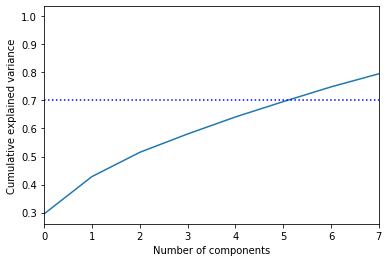

In [66]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.style.use('ggplot')
plt.axhline(y=0.7, c='b', linestyle='dotted')
plt.show()

In [67]:
m_pca = PCA(n_components=6)
X_pca = m_pca.fit_transform(X_std)

In [68]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_pca, y, test_size=.3)

In [69]:
def plot_original_vs_pred(y_pred, ytest, modelname):
    plt.scatter(y_pred, ytest)
    plt.plot(np.arange(-50,250), np.arange(-50,250), color='b', linestyle='dotted')
    plt.xlim((-50, 250))
    plt.ylim((-50, 250))
    plt.xlabel('predicted y')
    plt.ylabel('original y')
    plt.style.use('ggplot')
    plt.title(modelname)
    plt.show()

In [70]:
m1 = LinearRegression().fit(Xtrain, ytrain)
y_pred = m1.predict(Xtest)
error = group_mean_log_mae(ytest, y_pred, groups)
_ = group_mean_log_mae(ytrain, m1.predict(Xtrain), groups)
print('Linear Regression model has the train error of {}.'.format(_))
print('Linear Regression model has the test error of {}.'.format(error))

Linear Regression model has the train error of 2.6127227005731646.
Linear Regression model has the test error of 2.6103684635351074.


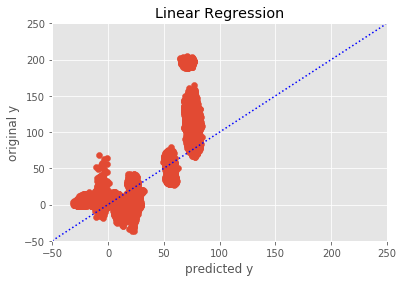

In [71]:
plot_original_vs_pred(y_pred, ytest, 'Linear Regression')

In [72]:
n_neighbors = 5
knn = KNeighborsRegressor(n_neighbors, weights='uniform')
knn.fit(Xtrain, ytrain)
y_pred = knn.predict(Xtest)
error = group_mean_log_mae(ytest, y_pred, groups)
_ = group_mean_log_mae(ytrain, knn.predict(Xtrain), groups)
print('Linear Regression model has the train error of {}.'.format(_))
print('Linear Regression model has the test error of {}.'.format(error))

Linear Regression model has the train error of 0.2378055453171093.
Linear Regression model has the test error of 0.4550480694025585.


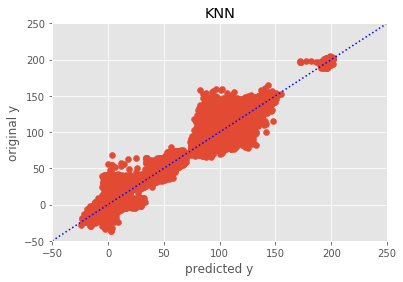

In [73]:
plot_original_vs_pred(y_pred, ytest, 'KNN')

In [74]:
dec = DecisionTreeRegressor(max_depth=20)
dec.fit(Xtrain, ytrain)
y_pred = dec.predict(Xtest)
error = group_mean_log_mae(ytest, y_pred, groups)
_ = group_mean_log_mae(ytrain, dec.predict(Xtrain), groups)
print('Linear Regression model has the train error of {}.'.format(_))
print('Linear Regression model has the test error of {}.'.format(error))

Linear Regression model has the train error of 0.2259429672527264.
Linear Regression model has the test error of 0.5892214594529612.


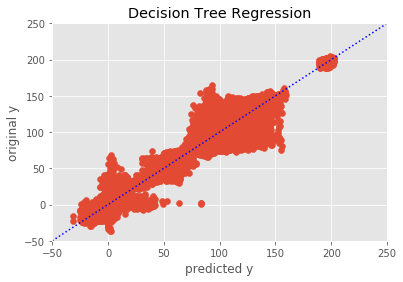

In [75]:
plot_original_vs_pred(y_pred, ytest, 'Decision Tree Regression')

In [76]:
from sklearn.linear_model import BayesianRidge
reg = BayesianRidge().fit(Xtrain, ytrain)
y_pred = reg.predict(Xtest)
error = group_mean_log_mae(ytest, y_pred, groups)
_ = group_mean_log_mae(ytrain, reg.predict(Xtrain), groups)
print('Linear Regression model has the train error of {}.'.format(_))
print('Linear Regression model has the test error of {}.'.format(error))

Linear Regression model has the train error of 2.6127228116162935.
Linear Regression model has the test error of 2.6103685743466243.


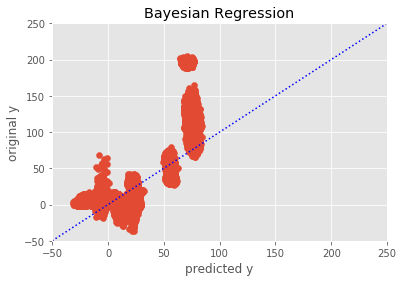

In [77]:
plot_original_vs_pred(y_pred, ytest, 'Bayesian Regression')

By comparing the above 4 simple models (no cross validation or regularization adjustement), we can see the most promising ones are `K Nearest Neighbors` and `Decision Tree Regressor`.

In [78]:
from sklearn.model_selection import KFold

def cv_score(model, X, y):
    groups = prepared.type
    result = 0.
    nfold = 3
    
    for fold_n, (train_index, valid_index) in enumerate(KFold(nfold).split(X)):
        print('Fold {} started at {}.'.format(fold_n+1, time.ctime()))
        X_train, X_valid = X[train_index], X[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        model.fit(X_train, y_train)
        print('Finished model fitting for Fold {}!'.format(fold_n+1))
        y_valid_pred = knn.predict(X_valid)
        result += group_mean_log_mae(y_valid, y_valid_pred, groups)
        
    return result/nfold

In [79]:
neighbor_scores = {}
for i in np.arange(1, 11):
    print('N neighbors = {} started at {}.'.format(i, time.ctime()))
    knn = KNeighborsRegressor(n_neighbors = i)
    neighbor_scores[i] = cv_score(knn, Xtrain, ytrain)

N neighbors = 1 started at Mon Jan 27 08:08:44 2020.
Fold 1 started at Mon Jan 27 08:08:44 2020.
Finished model fitting for Fold 1!
Fold 2 started at Mon Jan 27 08:10:13 2020.
Finished model fitting for Fold 2!
Fold 3 started at Mon Jan 27 08:11:41 2020.
Finished model fitting for Fold 3!
N neighbors = 2 started at Mon Jan 27 08:13:08 2020.
Fold 1 started at Mon Jan 27 08:13:08 2020.
Finished model fitting for Fold 1!
Fold 2 started at Mon Jan 27 08:14:59 2020.
Finished model fitting for Fold 2!
Fold 3 started at Mon Jan 27 08:16:55 2020.
Finished model fitting for Fold 3!
N neighbors = 3 started at Mon Jan 27 08:18:44 2020.
Fold 1 started at Mon Jan 27 08:18:45 2020.
Finished model fitting for Fold 1!
Fold 2 started at Mon Jan 27 08:22:59 2020.
Finished model fitting for Fold 2!
Fold 3 started at Mon Jan 27 08:29:45 2020.
Finished model fitting for Fold 3!
N neighbors = 4 started at Mon Jan 27 08:31:53 2020.
Fold 1 started at Mon Jan 27 08:31:53 2020.
Finished model fitting for Fold 1

In [80]:
best_n_neighbors = min(neighbor_scores, key=neighbor_scores.get)
print(best_n_neighbors)

5


The best parameter for `n_neighbors` is 5, meaning the previously fitted model `knn = KNeighborsRegressor(n_neighbors=5, weight='uniform')` is the best for the case of `knn`.

In [81]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.3)
columns = X.columns
nfold = 3
feature_importance = pd.DataFrame()
prediction=np.zeros(len(Xtest))
oof = np.zeros(len(Xtrain))
scores = []
result_dict = {}
params = {'num_leaves': 128,
          'min_child_samples': 79,
          'objective': 'regression',
          'max_depth': 13,
          'learning_rate': 0.2,
          "boosting_type": "gbdt",
          "subsample_freq": 1,
          "subsample": 0.9,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1,
          'reg_lambda': 0.3,
          'colsample_bytree': 1.0
         }

for fold_n, (train_index, valid_index) in enumerate(KFold(nfold).split(Xtrain)):
    print('Fold {} started at {}.'.format(fold_n+1, time.ctime()))
    X_train, X_valid = Xtrain[columns].iloc[train_index], Xtrain[columns].iloc[valid_index]
    y_train, y_valid = ytrain.iloc[train_index], ytrain.iloc[valid_index]
    gbm = lgb.LGBMRegressor(**params, n_estimators=10000, n_jobs=-1)
    gbm.fit(X_train, y_train,
              eval_set=[(X_train, y_train), (X_valid, y_valid)],
              eval_metric='mae',
              verbose=500,
              early_stopping_rounds=200)
    y_pred_valid = gbm.predict(X_valid)
    y_pred = gbm.predict(Xtest, num_iteration=gbm.best_iteration_)
    
    oof[valid_index] = y_pred_valid.reshape(-1,)
    scores.append(mean_absolute_error(y_valid, y_pred_valid))
    prediction += y_pred
    
    fold_importance = pd.DataFrame()
    fold_importance['feature'] = X.columns
    fold_importance['importance'] = gbm.feature_importances_
    fold_importance['fold'] = fold_n+1
    feature_importance = pd.concat([feature_importance, fold_importance], axis=0)
    
prediction = prediction / nfold
print('CV mean score: {:.4f}, std: {:.4f}.'.format(np.mean(scores), np.std(scores)))

Fold 1 started at Mon Jan 27 09:36:18 2020.
Training until validation scores don't improve for 200 rounds
[500]	training's l1: 1.50581	valid_1's l1: 1.60104
[1000]	training's l1: 1.38373	valid_1's l1: 1.54718
[1500]	training's l1: 1.29939	valid_1's l1: 1.51987
[2000]	training's l1: 1.23136	valid_1's l1: 1.50176
[2500]	training's l1: 1.174	valid_1's l1: 1.48888
[3000]	training's l1: 1.12387	valid_1's l1: 1.48006
[3500]	training's l1: 1.07893	valid_1's l1: 1.47255
[4000]	training's l1: 1.03793	valid_1's l1: 1.46563
[4500]	training's l1: 1.00032	valid_1's l1: 1.46055
[5000]	training's l1: 0.965496	valid_1's l1: 1.45565
[5500]	training's l1: 0.932542	valid_1's l1: 1.4511
[6000]	training's l1: 0.902499	valid_1's l1: 1.44809
[6500]	training's l1: 0.873832	valid_1's l1: 1.44489
[7000]	training's l1: 0.846918	valid_1's l1: 1.44238
[7500]	training's l1: 0.821472	valid_1's l1: 1.44063
[8000]	training's l1: 0.797224	valid_1's l1: 1.43862
[8500]	training's l1: 0.774149	valid_1's l1: 1.43694
[9000]

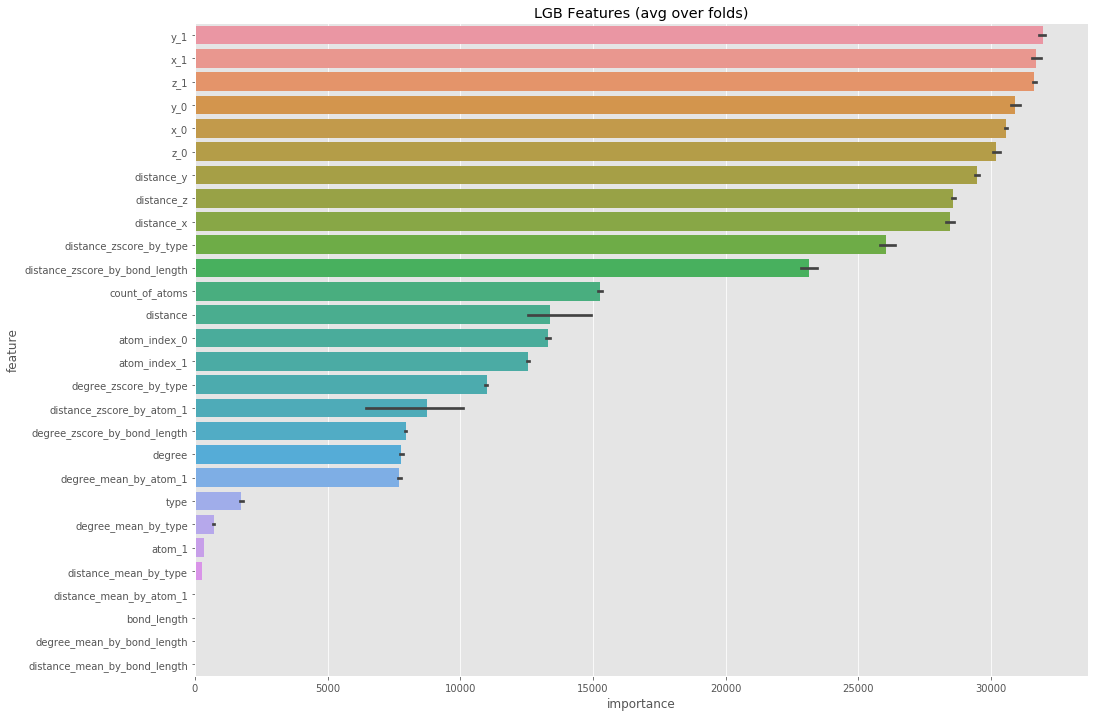

In [82]:
feature_importance['importance'] /= nfold
cols = feature_importance[['feature', 'importance']].groupby('feature').mean(
).sort_values('importance', ascending=False)[:50].index
best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

plt.figure(figsize=(16,12))
sns.barplot(x='importance', y='feature', data=best_features.sort_values('importance', ascending=False))
plt.title('LGB Features (avg over folds)')
plt.show()

In [83]:
result_dict['oof'] = oof
result_dict['prediction'] = prediction
result_dict['scores'] = scores
result_dict['feature_importance'] = feature_importance

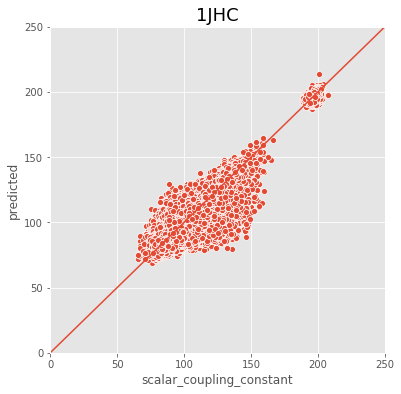

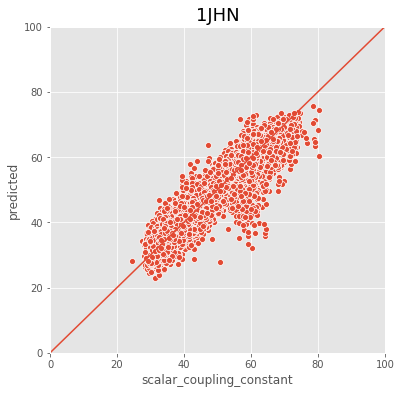

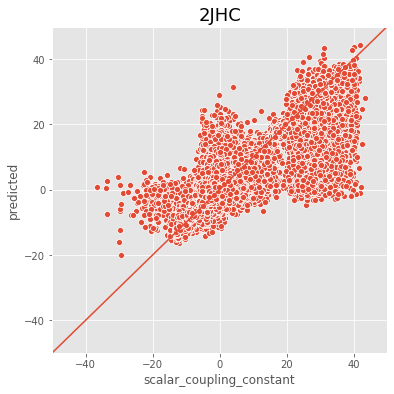

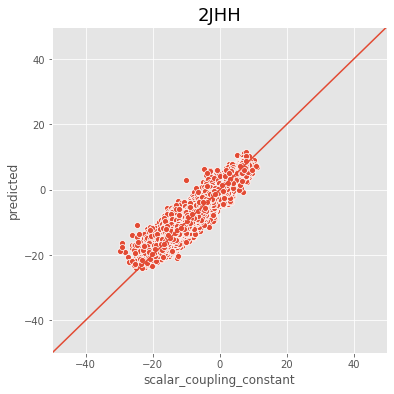

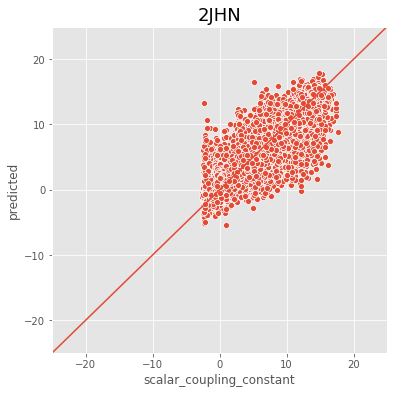

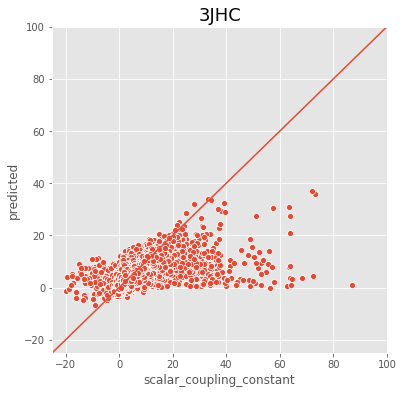

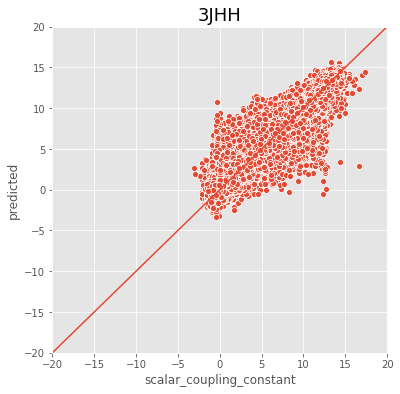

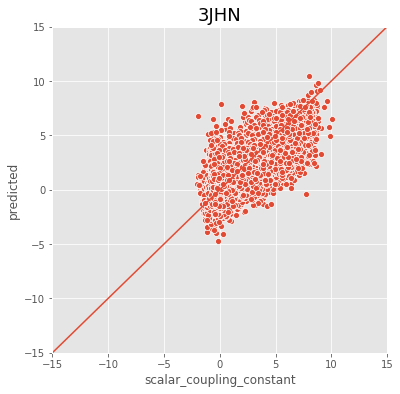

In [84]:
plot_data = pd.DataFrame(ytrain)
plot_data.index.name = 'id'
plot_data['yhat'] = result_dict['oof']
plot_data['type'] = prepared.loc[plot_data.index].type

def plot_oof_preds(ctype, llim, ulim):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x='scalar_coupling_constant',y='yhat',
                    data=plot_data.loc[plot_data['type']==ctype,
                    ['scalar_coupling_constant', 'yhat']]);
    plt.xlim((llim, ulim))
    plt.ylim((llim, ulim))
    plt.plot([llim, ulim], [llim, ulim])
    plt.xlabel('scalar_coupling_constant')
    plt.ylabel('predicted')
    plt.title(f'{ctype}', fontsize=18)
    plt.show()

plot_oof_preds('1JHC', 0, 250)
plot_oof_preds('1JHN', 0, 100)
plot_oof_preds('2JHC', -50, 50)
plot_oof_preds('2JHH', -50, 50)
plot_oof_preds('2JHN', -25, 25)
plot_oof_preds('3JHC', -25, 100)
plot_oof_preds('3JHH', -20, 20)
plot_oof_preds('3JHN', -15, 15)

In [86]:
plot_data

,scalar_coupling_constant,yhat,type
id,,,
1907332,11.231400,10.995986,3JHH
1728078,0.852588,0.816490,3JHN
2196709,-0.570736,1.356578,2JHC
597261,9.348510,8.247689,3JHC
1609842,111.124000,113.306489,1JHC
...,...,...,...
2989149,91.640900,91.767371,1JHC
2065145,3.162660,2.644019,3JHN
4182216,2.005160,2.392187,3JHC


In [87]:
group_mean_log_mae(plot_data['yhat'], plot_data['scalar_coupling_constant'], groups=plot_data['type'])

0.184165439554605

`LightgGBM` does a better job modeling data but is relatively time consuming. 